In [1]:
#!/usr/bin/env python2
#Inspire du fichier train_fcn8.py

import os
import argparse
import time
from getpass import getuser
from distutils.dir_util import copy_tree

import numpy as np
import random
import theano
import theano.tensor as T
from theano import config
import lasagne
from lasagne.regularization import regularize_network_params
from lasagne.objectives import categorical_crossentropy

import PIL.Image as Image
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
from sklearn.manifold import TSNE

from fcn_1D_general import buildFCN_1D
from metrics import jaccard, accuracy, crossentropy
from data_loader.cortical_layers import CorticalLayersDataset
from simple_model import build_simple_model

%matplotlib inline



Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)
/u/larocste/.local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
smooth_or_raw = 'raw'
batch_size = [500,1,1]
data_augmentation = {}
shuffle_at_each_epoch = False


train_iter = CorticalLayersDataset(
    which_set='train',
    smooth_or_raw = smooth_or_raw,
    batch_size=batch_size[0],
    data_augm_kwargs=data_augmentation,
    shuffle_at_each_epoch = shuffle_at_each_epoch,
    return_one_hot=False,
    return_01c=False,
    return_list=False,
    use_threads=True)

In [3]:
batch = train_iter.next()
X_batch = batch['data']
L_batch = batch['labels']
idx_batch = batch['indices']
X_batch = np.reshape(X_batch,(X_batch.shape[0],X_batch.shape[2]))

print 'X_batch shape', X_batch.shape
print 'L_batch shape', L_batch.shape


X_batch shape (500, 200)
L_batch shape (500, 200)


In [5]:
model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=4.0, 
                      learning_rate=1000.0, n_iter=1000, n_iter_without_progress=30, 
                      min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, 
                      random_state=None, method='barnes_hut', angle=0.5)

In [6]:
X_batch_TSNE = model.fit_transform(X_batch)
L_batch_TSNE = model.fit_transform(L_batch)
#print X_batch_TSNE

In [7]:
def make_2Darray(arr, height = 25):
    arr = np.reshape(arr, (1,arr.shape[0]))
    x = np.repeat(arr, height, 0)
    return x

In [8]:
#From Francis Dutil

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

def show_rep(data, coords):
    fig, ax = plt.subplots(figsize = (16, 16))
    for img, coord in zip(data, coords):
        d = make_2Darray(img)
        d = np.ma.masked_where(d == 0, d)
        imagebox = OffsetImage(d, zoom=0.5)
        ab = AnnotationBbox(imagebox, coord,
                        xybox=(0., 0.),
                        xycoords='data',
                        boxcoords="offset points",
                            frameon=False)
        ax.add_artist(ab)
        
        

    ax.set_xlim(min(coords[:,0]), max(coords[:,0]))
    ax.set_ylim(min(coords[:,1]), max(coords[:,1]))    
    plt.show()

With 500 samples


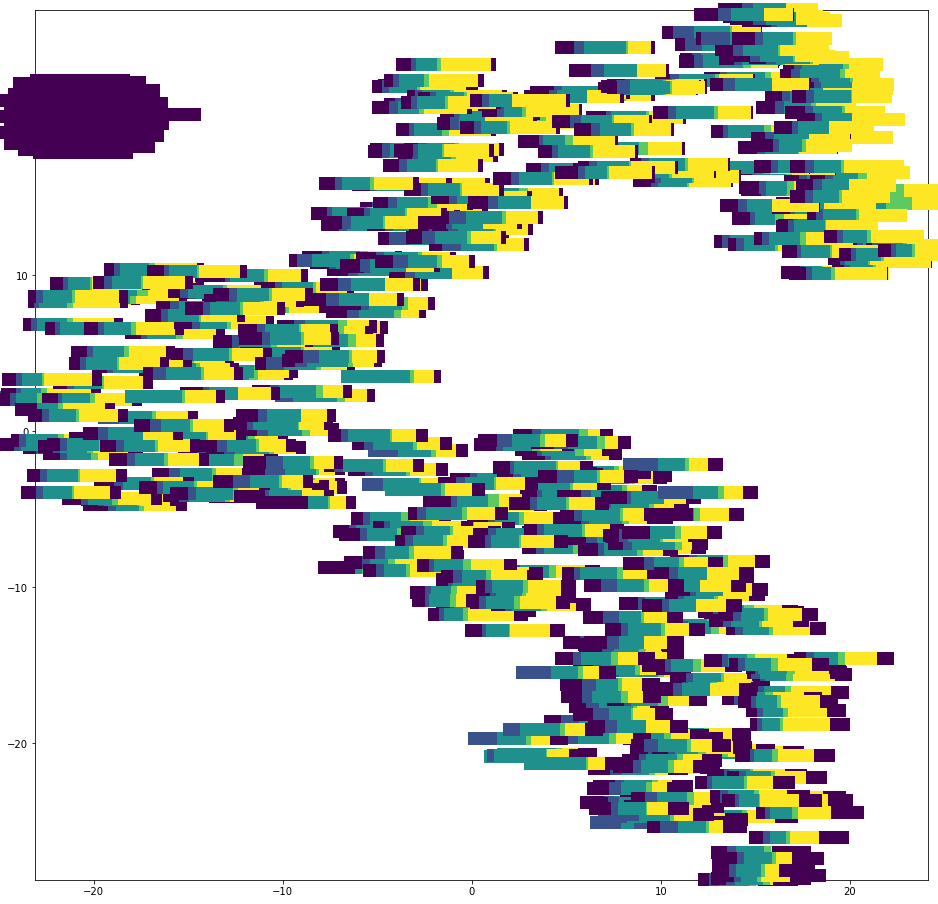

In [9]:
print 'With 500 samples'
show_rep(L_batch, L_batch_TSNE)

With 500 samples


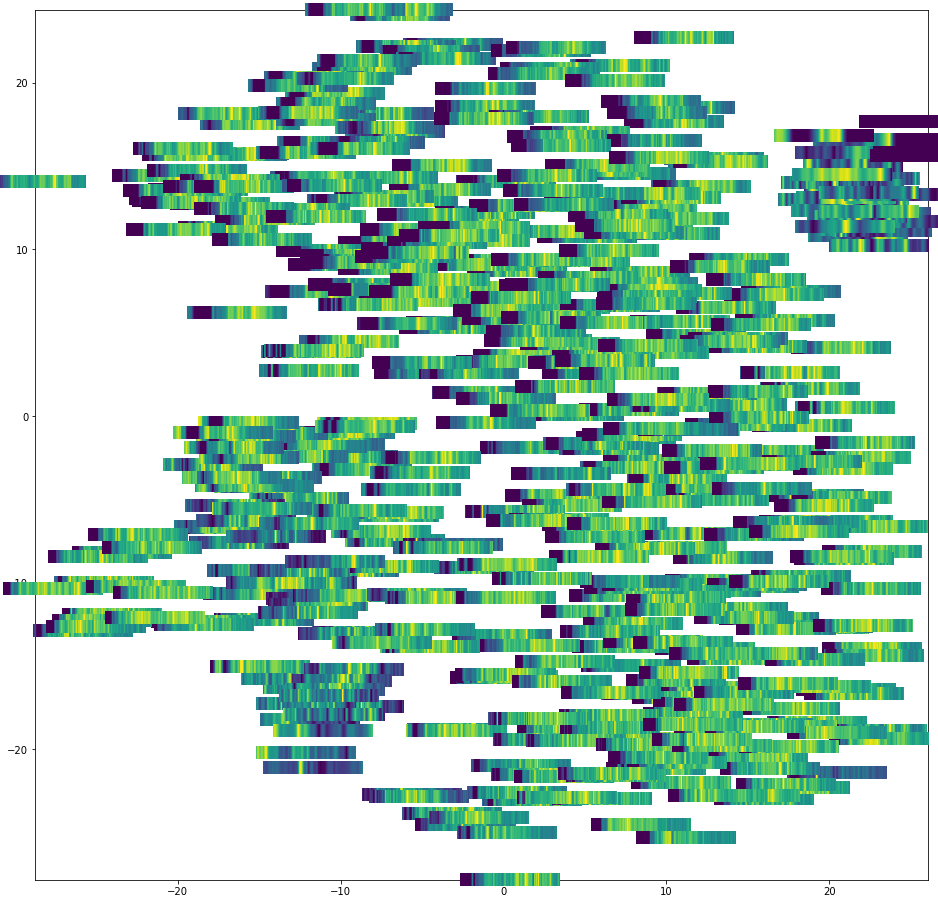

In [10]:
print 'With 500 samples'
show_rep(X_batch, X_batch_TSNE)

With 1500 samples


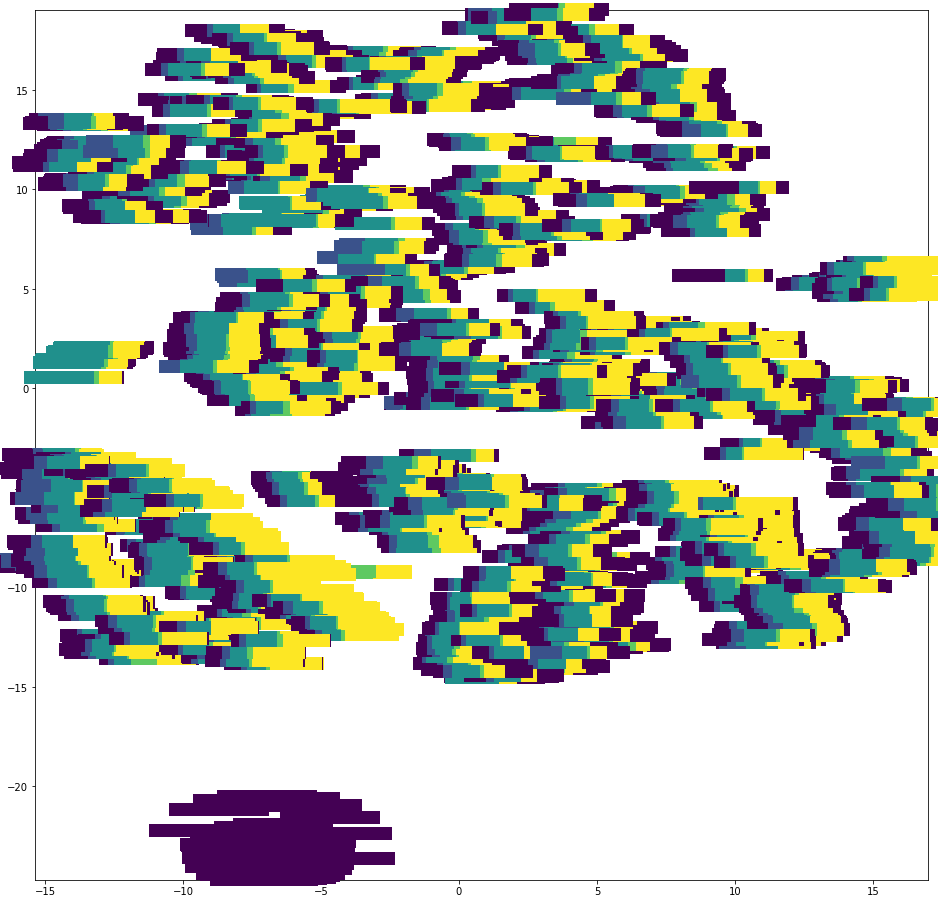

In [43]:
print 'With 1500 samples'
show_rep(L_batch, L_batch_TSNE)

With 1500 samples


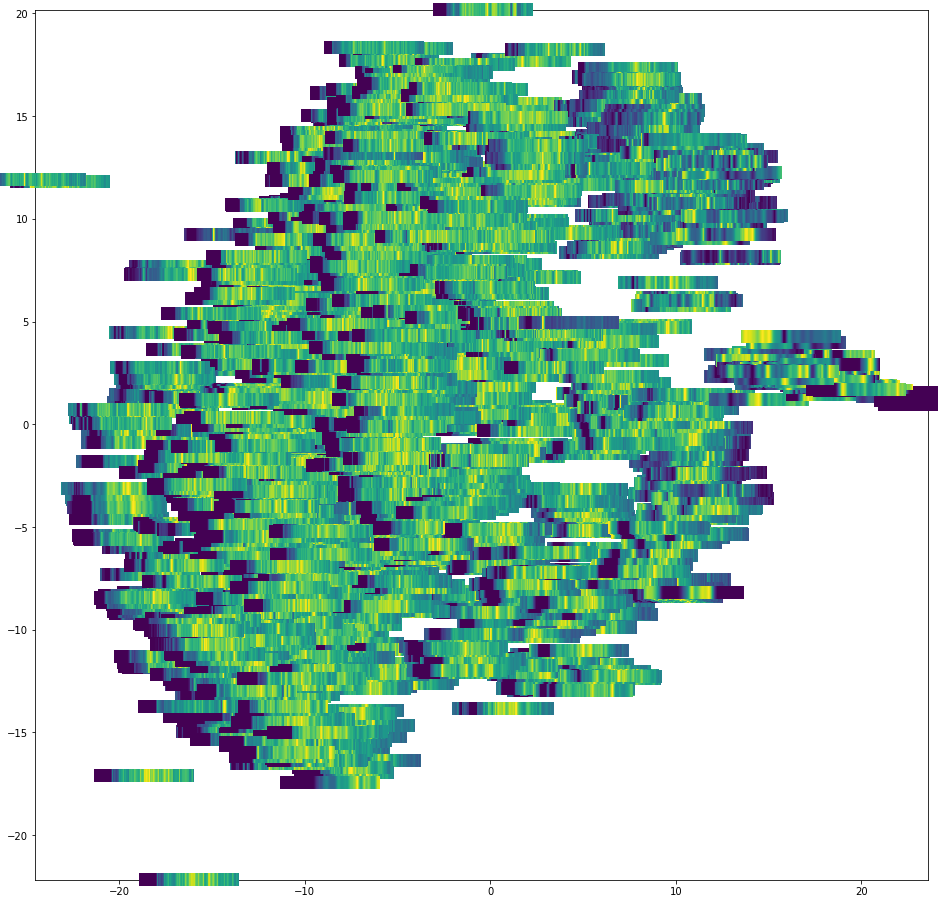

In [44]:
print 'With 1500 samples'
show_rep(X_batch, X_batch_TSNE)

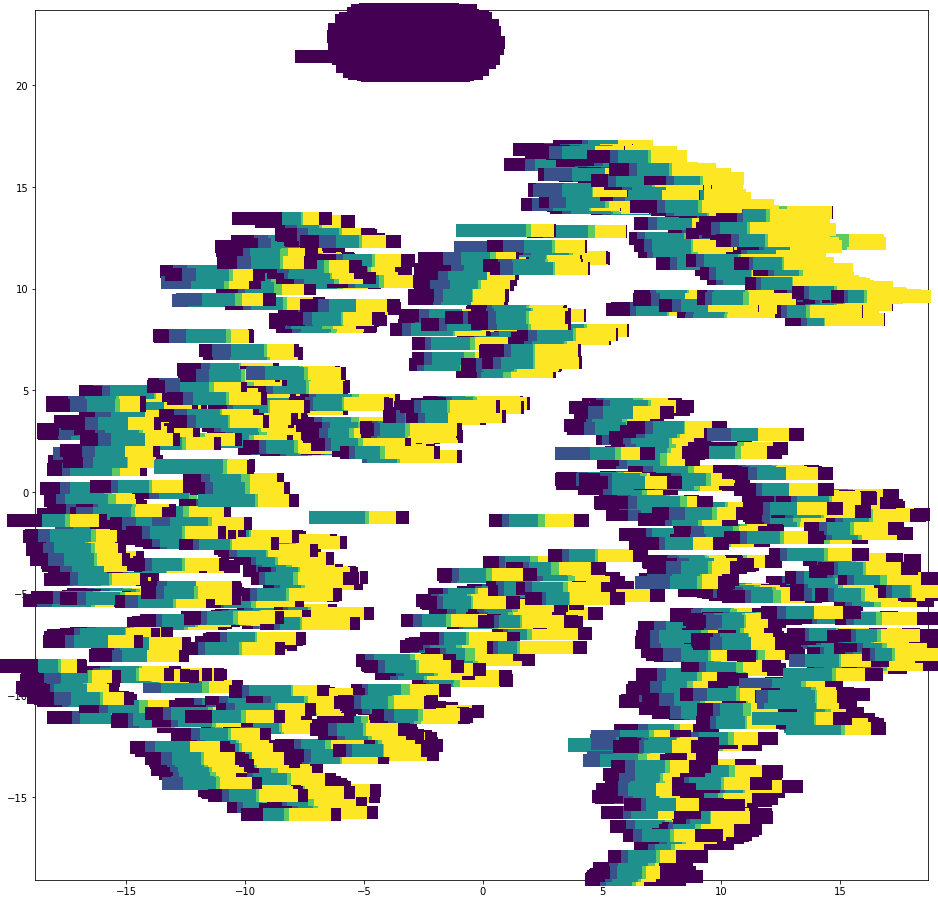

In [33]:
#WIth 1000 samples
show_rep(L_batch, L_batch_TSNE)

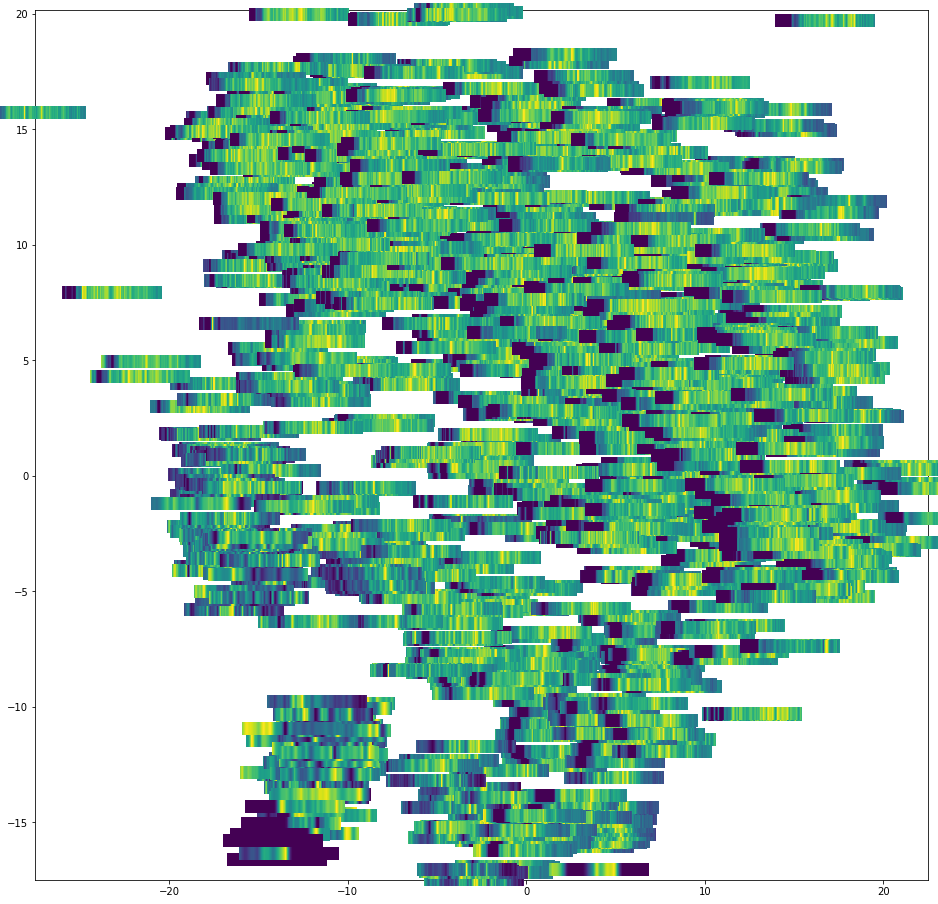

In [34]:
show_rep(X_batch, X_batch_TSNE)

## References

- http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- https://lvdmaaten.github.io/tsne/
- Francis Dutil Repo
